In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
data = pd.read_csv("train_x_may06_5pm.csv")

c:\program files (x86)\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (28,43,45,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 86 columns):
Unnamed: 0                          100000 non-null int64
access                              65564 non-null object
accommodates                        100000 non-null float64
amenities                           100000 non-null object
availability_30                     100000 non-null float64
availability_365                    100000 non-null int64
availability_60                     100000 non-null float64
availability_90                     100000 non-null float64
bathrooms                           100000 non-null float64
bed_type                            100000 non-null object
bedrooms                            100000 non-null float64
beds                                100000 non-null float64
cancellation_policy                 100000 non-null object
city                                100000 non-null object
city_name                           99999 non-null object
cl

In [3]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
train_y = pd.read_csv("airbnb_train_y.csv")

In [5]:
train_y.high_booking_rate = pd.to_numeric(train_y['high_booking_rate'], errors='coerce')
train_y.high_booking_rate .fillna(train_y.high_booking_rate.mode()[0], inplace = True)
train_y.high_booking_rate.isnull().value_counts()

False    100000
Name: high_booking_rate, dtype: int64

In [6]:
data['24-hour-check'] = data['24-hour-check'].astype('category')
data["24-hour-check"] = data["24-hour-check"].cat.codes
data['24-hour-check'] = data['24-hour-check'].astype('category')

data.bed_type = data.bed_type.astype('category')
data["bed_type"] = data["bed_type"].cat.codes
data.bed_type = data.bed_type.astype('category')

data.cancellation_policy = data.cancellation_policy.astype('category')
data["cancellation_policy"] = data["cancellation_policy"].cat.codes
data.cancellation_policy = data.cancellation_policy.astype('category')

data.Wifi = data.Wifi.astype('category')
data["Wifi"] = data["Wifi"].cat.codes
data.Wifi = data.Wifi.astype('category')

data.parking = data.parking.astype('category')
data["parking"] = data["parking"].cat.codes
data.parking = data.parking.astype('category')

data.Kitchen = data.Kitchen.astype('category')
data["Kitchen"] = data["Kitchen"].cat.codes
data.Kitchen = data.Kitchen.astype('category')

data.Breakfast = data.Breakfast.astype('category')
data["Breakfast"] = data["Breakfast"].cat.codes
data.Breakfast = data.Breakfast.astype('category')

data.ac = data.ac.astype('category')
data["ac"] = data["ac"].cat.codes
data.ac = data.ac.astype('category')

data.Heating = data.Heating.astype('category')
data["Heating"] = data["Heating"].cat.codes
data.Heating = data.Heating.astype('category')

data.host_has_profile_pic = data.host_has_profile_pic.astype('category')
data["host_has_profile_pic"] = data["host_has_profile_pic"].cat.codes
data.host_has_profile_pic = data.host_has_profile_pic.astype('category')

data.host_identity_verified = data.host_identity_verified.astype('category')
data["host_identity_verified"] = data["host_identity_verified"].cat.codes
data.host_identity_verified = data.host_identity_verified.astype('category')

data.host_is_superhost = data.host_is_superhost.astype('category')
data["host_is_superhost"] = data["host_is_superhost"].cat.codes
data.host_is_superhost = data.host_is_superhost.astype('category')

data.host_response_time = data.host_response_time.astype('category')
data["host_response_time"] = data["host_response_time"].cat.codes
data.host_response_time = data.host_response_time.astype('category')

data.host_verifications = data.host_verifications.astype('category')
data["host_verifications"] = data["host_verifications"].cat.codes
data.host_verifications = data.host_verifications.astype('category')

data.security_deposit = data.security_deposit.astype('category')
data["security_deposit"] = data["security_deposit"].cat.codes
data.security_deposit = data.security_deposit.astype('category')

data.state = data.state.astype('category')
data["state"] = data["state"].cat.codes
data.state = data.state.astype('category')

data.property_type=data.property_type.astype('category')
data["property_type"] = data["property_type"].cat.codes
data.property_type=data.property_type.astype('category')

data.instant_bookable = data.instant_bookable.astype('category')
data["instant_bookable"] = data["instant_bookable"].cat.codes
data.instant_bookable = data.instant_bookable.astype('category')

data.is_business_travel_ready = data.is_business_travel_ready.astype('category')
data["is_business_travel_ready"] = data["is_business_travel_ready"].cat.codes
data.is_business_travel_ready = data.is_business_travel_ready.astype('category')

data.is_location_exact = data.is_location_exact.astype('category')
data["is_location_exact"] = data["is_location_exact"].cat.codes
data.is_location_exact = data.is_location_exact.astype('category')

data.city = data.city.astype('category')
data["city"] = data["city"].cat.codes
data.city = data.city.astype('category')

In [7]:
data.room_type = data.room_type.astype('category')
data["room_type"] = data["room_type"].cat.codes
data.room_type = data.room_type.astype('category')

data.year_first_review = data.year_first_review.astype('category')
data["year_first_review"] = data["year_first_review"].cat.codes
data.year_first_review = data.year_first_review.astype('category')

data.year_host  = data.year_host .astype('category')
data["year_host"] = data["year_host"].cat.codes
data.year_host  = data.year_host .astype('category')

data.transit_available = data.transit_available.astype('category')
data["transit_available"] = data["transit_available"].cat.codes
data.transit_available = data.transit_available.astype('category')

data.Reviews = data.Reviews.astype('category')
data["Reviews"] = data["Reviews"].cat.codes
data.Reviews = data.Reviews.astype('category')

data.weekly_price = data.weekly_price.astype('category')
data["weekly_price"] = data["weekly_price"].cat.codes
data.weekly_price = data.weekly_price.astype('category')

data.monthly_price = data.monthly_price.astype('category')
data["monthly_price"] = data["monthly_price"].cat.codes
data.monthly_price = data.monthly_price.astype('category')

data.house_rules = data.house_rules.astype('category')
data["house_rules"] = data["house_rules"].cat.codes
data.house_rules = data.house_rules.astype('category')

data.verification = data.verification.astype('category')
data["verification"] = data["verification"].cat.codes
data.verification = data.verification.astype('category')

data.Email = data.Email.astype('category')
data["Email"] = data["Email"].cat.codes
data.Email = data.Email.astype('category')

data.Phone = data.Phone.astype('category')
data["Phone"] = data["Phone"].cat.codes
data.Phone = data.Phone.astype('category')

data.Facebook = data.Facebook.astype('category')
data["Facebook"] = data["Facebook"].cat.codes
data.Facebook = data.Facebook.astype('category')

data.require_guest_phone_verification = data.require_guest_phone_verification.astype('category')
data["require_guest_phone_verification"] = data["require_guest_phone_verification"].cat.codes
data.require_guest_phone_verification = data.require_guest_phone_verification.astype('category')

data.require_guest_profile_picture  = data.require_guest_profile_picture.astype('category')
data["require_guest_profile_picture"] = data["require_guest_profile_picture"].cat.codes
data.require_guest_profile_picture  = data.require_guest_profile_picture.astype('category')





In [8]:
X = data[['accommodates', 'availability_30', 'availability_60', 'availability_90', 'availability_365','bathrooms','bed_type',
             'cleaning_fee', 'Wifi', 'parking', 'Kitchen', '24-hour-check', 'Breakfast', 'ac', 'Heating', 'property_type', 'price', 
             'bedrooms', 'beds','security_deposit','state', 'cancellation_policy', 'extra_people', 'guests_included',
         'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_response_rate', 'host_response_time',
        'host_total_listings_count', 'maximum_nights', 'minimum_nights', 'instant_bookable', 'is_business_travel_ready',
         'is_location_exact', 'room_type', 'city', 'monthly_price','year_host','year_first_review',
          'require_guest_profile_picture', 'require_guest_phone_verification', 'Facebook', 'Phone', 'Email', 'verification',
          'house_rules', 'weekly_price','transit_available']]
y = train_y['high_booking_rate']

In [17]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
print(model.feature_importances_)

[0.02681892 0.05321056 0.05092421 0.05815529 0.04394188 0.01793636
 0.00385143 0.03712204 0.0146564  0.01552817 0.01007491 0.01209411
 0.01238279 0.0142922  0.00602053 0.02361613 0.03653104 0.0218218
 0.02099955 0.01757655 0.02504606 0.0231395  0.02742675 0.02312896
 0.0005477  0.01572322 0.03358209 0.01747787 0.02879787 0.0316535
 0.02457735 0.03757557 0.03930639 0.01030559 0.01363374 0.01532689
 0.02491259 0.00168371 0.03228894 0.0283578  0.00355904 0.00428493
 0.         0.         0.         0.00464655 0.01217648 0.00940789
 0.01387821]


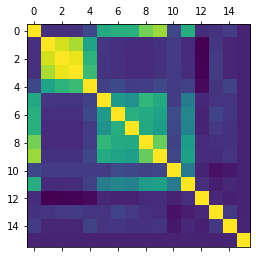

In [19]:
plt.matshow(X.corr())

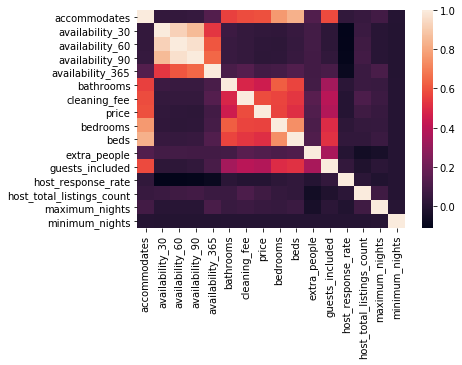

In [21]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [22]:
corr

,accommodates,availability_30,availability_60,availability_90,availability_365,bathrooms,cleaning_fee,price,bedrooms,beds,extra_people,guests_included,host_response_rate,host_total_listings_count,maximum_nights,minimum_nights
accommodates,1.000000,0.039533,0.039899,0.048230,0.127715,0.558343,0.585115,0.594829,0.768612,0.834650,0.126956,0.582315,0.032806,0.050160,0.079958,-0.000682
availability_30,0.039533,1.000000,0.925916,0.860007,0.531603,0.063135,0.044246,0.034289,0.027669,0.050614,0.084354,0.020946,-0.111577,0.061205,0.008718,-0.003215
availability_60,0.039899,0.925916,1.000000,0.968179,0.606030,0.057632,0.042691,0.025861,0.022236,0.045798,0.084257,0.022046,-0.105274,0.074070,0.007061,-0.003675
availability_90,0.048230,0.860007,0.968179,1.000000,0.646925,0.057092,0.044337,0.022017,0.024863,0.051335,0.083607,0.031729,-0.098933,0.081234,0.006924,-0.003994
availability_365,0.127715,0.531603,0.606030,0.646925,1.000000,0.104000,0.131913,0.082411,0.089054,0.122918,0.080183,0.097138,-0.083920,0.060556,0.102833,-0.003857
bathrooms,0.558343,0.063135,0.057632,0.057092,0.104000,1.000000,0.486492,0.451791,0.625603,0.566134,0.086435,0.341216,0.014497,0.058935,0.054058,-0.001398
cleaning_fee,0.585115,0.044246,0.042691,0.044337,0.131913,0.486492,1.000000,0.583707,0.569603,0.532773,0.141147,0.392975,-0.000068,0.112346,0.065403,-0.002156
price,0.594829,0.034289,0.025861,0.022017,0.082411,0.451791,0.583707,1.000000,0.561833,0.510149,0.126970,0.378596,-0.001505,0.072344,0.049941,-0.002034
bedrooms,0.768612,0.027669,0.022236,0.024863,0.089054,0.625603,0.569603,0.561833,1.000000,0.739927,0.109145,0.502154,0.021747,0.042685,0.046722,-0.001228
beds,0.834650,0.050614,0.045798,0.051335,0.122918,0.566134,0.532773,0.510149,0.739927,1.000000,0.119979,0.520681,0.034114,0.032929,0.060283,0.000245


In [9]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [13]:
model = LogisticRegression()
# create the RFE model and select best attributes
rfe = RFE(model,30)
rfe = rfe.fit(X,y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True False False  True False  True  True
 False  True False False False  True  True  True False  True False  True
  True False  True False  True False False  True  True  True  True  True
 False  True  True  True  True  True False False False  True  True  True
  True]
[ 1  1 13  1 14  1 15  4  1  2  1  1 10  1  3  9 11  1  1  1  8  1 12  1
  1  5  1  6  1  7 17  1  1  1  1  1 16  1  1  1  1  1 18 20 19  1  1  1
  1]


In [14]:
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['accommodates', 'availability_30', 'availability_90', 'bathrooms', 'Wifi', 'Kitchen', '24-hour-check', 'ac', 'bedrooms', 'beds', 'security_deposit', 'cancellation_policy', 'guests_included', 'host_has_profile_pic', 'host_is_superhost', 'host_response_time', 'minimum_nights', 'instant_bookable', 'is_business_travel_ready', 'is_location_exact', 'room_type', 'monthly_price', 'year_host', 'year_first_review', 'require_guest_profile_picture', 'require_guest_phone_verification', 'verification', 'house_rules', 'weekly_price', 'transit_available']
